## Natural Language Processing - Final Project

__Group Members:__
1) Aanal Patel - C0910376
2) Bimal Shresta - C0919385
3) Danilo Diaz - C0889539
4) Ernie Sumoso - C0881591
5) Jayachandhran Saravanan - C0910392

__Main Sections__

1. Data Collection
2. Text wrangling/cleaning
    - Removing stopwords
    - number removal
    - punctuation removal
    - whitespace removal
    
3. Verbs simmilarity
    - Sentence & Word tokenization
    - Stemming
    - Lemmatization
    
4. Action verbs recommendation
    - identifying POS
    - Synonyms & Antonyms (WordNet -> Synsets)
    - Simmilarity between words (Synsets)
    
5. Keywords simmilarity
    - identifying POS
    - Named Entity recognition
    - Word Collocations: Bigrams (PMI)
    - Word Collocations: Trigrams (PMI)
    
6. Correcting grammatical errors from resume
    - Regex (finding patterns)
    - Spell Checker
    
7. Resume sentiment analysis
    - Sentiment analysis (scores & 4 keypoints)
    
8. Calculating Resume - Job Description overall simmilarity
    - Bag of Words
    - TFIDF
    - Cosine/pairwise simmilarity

__8. Classification Models -(Module 5)-__

    - Feature extraction (extract most common words from job description)
    - Split dataset train & test
    - Classification Model (Naive Bayes)
    - Saving, loading, evaluating model w/ new data
    - Classification Pipelines --(Module 8)--

9. Finding relations between resumes & job descriptions
    - Word2Vec (static word embedding)


- Chunking & Chinking **(Module 7)**


### 1. Data Collection

We have 2 main sources of data:
- __resumes dataset__: retrieved from Kaggle source (https://www.kaggle.com/code/medelbachirkhellaf/resume-dataset/input)
- __job descriptions__: web scrapped from Indeed using our GitHub project (https://github.com/NILodio/JobsPyMacher)

The scripts to generate our Job Descriptions datset is located under the directory __/src/data__ in our GitHub project.

We created a class __JobScrapperAPI__ that calls our implemented function __scrape_jobs__ located in __/src/jobscrapper__.

Our project scraps public posts from Indeed Canada (https://ca.indeed.com/), however it can be used for other websites.

After executing the main script __make_raw_data.py__ to generate the dataset, the result is a unified CSV file containing all searched job descriptions.

Some of the parameters implemented for the dataset generation script are:
- __num_jobs__: number of jobs to scrap
- __num_batch__: number of jobs per search term to scrap
- __JOBS_WEBSITE__: set as environment variable, webiste to scrap
- __JOBS_COUNTRY__: set as environment variable, country to search for jobs (default Canada)
- __SEARCH_TERMS__: set as environment variable, list of search terms to insert in the website for job scrapping

Our generated dataset was saved into __jobs_13547.csv__. The most relevant columns are:
- __description__: job description from the post
- __search term__: search term utilized on the website

Let's load both data sources (resumes and job descriptions) into memory.

In [121]:
import pandas as pd
# loading the job descriptions dataset
df_jobs = pd.read_csv('jobs_13547.csv')
df_jobs.tail()

,site,job_url,job_url_direct,title,company,location,job_type,date_posted,interval,min_amount,...,company_addresses,company_industry,company_num_employees,company_revenue,company_description,logo_photo_url,banner_photo_url,ceo_name,ceo_photo_url,search_term
13541,indeed,https://ca.indeed.com/viewjob?jk=6cdc51ad05295587,https://www.westlaketalent.com/planning-and-in...,Planning & Inventory Analyst,Westlake Careers,"Woodbridge, ON, CA",fulltime,2024-03-08,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,data analyst
13542,indeed,https://ca.indeed.com/viewjob?jk=cdfdabac384c17eb,http://ca.indeed.com/job/sql-developer-and-bus...,SQL Developer and Business Intelligence Specia...,Dex Clothing,"Saint-Laurent, QC, CA",fulltime,2024-03-05,NaN,NaN,...,"390 Deslauriers, Saint-Laurent, QC, H4N-1V8",Retail,51 to 200,$25M to $100M (USD),NaN,https://d2q79iu7y748jz.cloudfront.net/s/_squar...,NaN,NaN,NaN,data analyst
13543,indeed,https://ca.indeed.com/viewjob?jk=9ac1c7981bb3c9bb,https://jsv3.recruitics.com/redirect?rx_cid=36...,Business Analyst,GFL Environmental,"Mississauga, ON, CA",fulltime,2024-02-22,NaN,NaN,...,"Vaughan, ON",NaN,"10,000+",$1B to $5B (USD),GFL is committed to providing a greener altern...,https://d2q79iu7y748jz.cloudfront.net/s/_squar...,https://d2q79iu7y748jz.cloudfront.net/s/_heade...,Patrick Dovigi,https://d2q79iu7y748jz.cloudfront.net/s/_ceoph...,data analyst
13544,indeed,https://ca.indeed.com/viewjob?jk=4aa684848233fe0b,https://cclfg.cclgroup.com/careers/opportuniti...,"Data Analyst, Investment Data Analytics","Connor, Clark & Lunn Financial Group","Vancouver, BC, CA",NaN,2024-02-05,NaN,NaN,...,NaN,Banks And Financial Services,"501 to 1,000",NaN,NaN,https://d2q79iu7y748jz.cloudfront.net/s/_squar...,NaN,NaN,NaN,data analyst
13545,indeed,https://ca.indeed.com/viewjob?jk=f8ce8d3bb493631d,https://jobs.toronto.ca/jobsatcity/job/Toronto...,BUSINESS ANALYST,City of Toronto,"Toronto, ON, CA","temporary, fulltime",2023-10-13,NaN,NaN,...,"100 Queen Street West, Toronto, ON, Canada, On...",Government,"10,000+",more than $10B (USD),NaN,https://d2q79iu7y748jz.cloudfront.net/s/_squar...,NaN,Olivia Chow,NaN,data analyst


Our Kaggle source contains the resumes in PDF format and organized under multiple folders (inside __data__),

so we need to properly __extract the text from the PDFs.__

Let's also add the name of the folders (professions) as one column.

In [16]:
from os import listdir # list files of a directory
from os.path import isfile, isdir, join # file operations
import PyPDF2 # pdf processing library

# class in charge of loading our resume data source
class ResumeDataLoader:
    def get_list_of_files(self, data_path):
        '''
            function: get_list_of_files -> creates a list of the file paths 
            arg: data_path (str) -> path of the file
            return: files (list) -> List of files
        '''
        # get list of files from the data path
        files = [file for file in listdir(data_path) if isfile(join(data_path, file))]
        # get list of folders from the data path
        dirs = [(file, join(data_path, file)) for file in listdir(data_path) if isdir(join(data_path, file))]
        # get files from each folder
        for i, dir_ in enumerate([d[1] for d in dirs]):
            files += [(dirs[i][0], join(dir_, file), file) for file in listdir(dir_) if isfile(join(dir_, file))]
        return files # return all files
    
    def get_text_from_pdf(self, file_path):
        '''
            function: get_text_from_pdf -> fetch the data from the file path
            arg: file_path (str) -> path of the file
            return: text (str) -> content of the file
        '''
        file = open(file_path, 'rb') # open file in read mode
        reader = PyPDF2.PdfReader(file) # instantiate the pdf2 class to read our file
        text = "" 
        for page in reader.pages: # extracting text of each page
            text += page.extract_text()
        file.close()
        return text # return the entire pdf raw text

    def convert_pdfs_into_dataframe(self, pdfs):
        '''
            function: convert_pdfs_into_dataframe -> converts pdf data into a data frame 
            arg: pdfs (list) -> list of the file paths
            return: df (pandas.core.frame.DataFrame) -> Data frame 
        '''
        rows = [] # save future dataframe rows into a list
        for pdf in pdfs: # for each file, create a dictionary (keys-columns, values-row values)
            rows.append({'file': pdf[2], 'profession': pdf[0], 'resume':self.get_text_from_pdf(pdf[1])})
        return pd.DataFrame(rows) # return the resultant dataframe

In [14]:
rdl = ResumeDataLoader() # instantiate our class
files = rdl.get_list_of_files('data') # read all file names (recursively under data folder)
print("# Files:", len(files)) # display resultant list
files[:5]

# Files: 2484


[('ACCOUNTANT', 'data\\ACCOUNTANT\\10554236.pdf', '10554236.pdf'),
 ('ACCOUNTANT', 'data\\ACCOUNTANT\\10674770.pdf', '10674770.pdf'),
 ('ACCOUNTANT', 'data\\ACCOUNTANT\\11163645.pdf', '11163645.pdf'),
 ('ACCOUNTANT', 'data\\ACCOUNTANT\\11759079.pdf', '11759079.pdf'),
 ('ACCOUNTANT', 'data\\ACCOUNTANT\\12065211.pdf', '12065211.pdf')]

In [15]:
df_resumes = rdl.convert_pdfs_into_dataframe(files) # convert pdfs into text into a dataframe
df_resumes.tail()

,file,profession,resume
2479,86322251.pdf,TEACHER,READING TEACHER\nSummary\nI am a highly motiva...
2480,86597425.pdf,TEACHER,HISTORY TEACHER\nProfessional Summary\nTo be e...
2481,90363254.pdf,TEACHER,"TEACHER\nSummary\nHighly ethical, dependable, ..."
2482,96547039.pdf,TEACHER,TEACHER\nSummary\nTalented early education pro...
2483,99244405.pdf,TEACHER,Kpandipou Koffi\nSummary\nCompassionate teachi...


Let's __remove missing values from job description texts and resumes__, and remain with a fully textual columns.

These missing values won't contribute anything to our analysis.

In [122]:
# identifying number of missing values from jobs
df_jobs[df_jobs['description'].isna()]

,site,job_url,job_url_direct,title,company,location,job_type,date_posted,interval,min_amount,...,company_addresses,company_industry,company_num_employees,company_revenue,company_description,logo_photo_url,banner_photo_url,ceo_name,ceo_photo_url,search_term


In [85]:
# identifying number of missing values from resumes
df_resumes[df_resumes['resume'].isna()]

,Unnamed: 0,file,profession,resume
802,802,12632728.pdf,BUSINESS-DEVELOPMENT,NaN


In [88]:
# dropping missing values and checking missing values again
df_resumes = df_resumes[df_resumes['resume'].notna()]
df_resumes[df_resumes['resume'].isna()]

,Unnamed: 0,file,profession,resume


In [17]:
# save resume dataset as a CSV for fast reference in later steps
df_resumes.to_csv('resumes.csv')

### Exploratory Data Analysis

In [9]:
class EDABasic:
    def __init__(self, df):
        '''
            function: Constructor
            arg: df (pandas.core.frame.DataFrame) -> dataframe to perform EDA
            return: None
        '''
        self.df = df
        self.basicEDA()
        
    def basicEDA(self):
        '''
            function: basicEDA -> This function will call the function that are used for EDA
            arg: None
            return: None
        '''
        self.shapeAndSizeFunction()
        self.nullValuesFunction()
        self.duplicatedFunction()
        self.infoFunction()

    def shapeAndSizeFunction(self):
        '''
            function: shapeAndSizeFunction -> It is a function to check the shape and the size of the data set
            arg: None
            return: None
        '''
        # checking the shape of the data frame
        self.printLine()
        shape = self.df.shape
        print("SHAPE OF DATAFRAME:")
        print('Columns = {}'.format(shape[0]))
        print('Rows = {}'.format(shape[1]))
        size = self.df.size
        self.printLine()
        print("SIZE OF DATAFRAME: {}".format(size))
        
    def nullValuesFunction(self):
        '''
            function: nullValuesFunction -> It is a function to check the count of the missing values in the dataframe
            arg: None
            return: None
        '''
        # cheking the missing values
        nullValues = self.df.isna().sum()
        noNull = 'No Null values' if nullValues.sum == 0 else nullValues
        self.printLine()
        print('Checking the missing values:\n')
        print('Missing values:\n{}'.format(noNull))
        
    def duplicatedFunction(self):
        '''
            function: duplicatedFunction -> It is a function to check the count of the duplicate rows in the dataframe
            arg: None
            return: None
        '''
        # checking the duplicates
        duplicates = self.df.duplicated().sum()
        noduplicates = 'No Duplicat values' if duplicates == 0 else duplicates
        self.printLine()
        print('Checking the Duplicate values:')
        print('Duplicate values = {}'.format(noduplicates))
        
    def infoFunction(self):
        '''
            function: infoFunction -> This function will give the basic information about the dataframe
            arg: None
            return: None
        '''
        # information of the data set
        self.printLine()
        print('The information: ')
        print(self.df.info(),'')
    
    def boolPlot(self, col):
        '''
            function: boolPlot -> This function plots pie chart for boolean values
            arg: col(str) -> name of the column
            return: None
        '''
        size = self.df[col].value_counts()
        plt.pie(size, labels=size.index, autopct='%1.1f%%')
        plt.legend(labels=size.index)
        plt.title('boolean feature:{}'.format(col))
        plt.show()
        
    def barPlot(self, col):
        '''
            function: barPlot -> This function plots bar chart for catagorical values.
            arg: col(str) -> name of the column
            return: None
        '''
        size = self.df[col].value_counts()
        percent = round((size * 100) / self.df.shape[0], 1) # claulating the percentage of the frequency
        sns.barplot(x=percent.index, y=percent.values, palette='dark')
        plt.xticks(rotation=90)
        plt.title('feature:{}'.format(col))
        
        plt.show()
        
    def printLine(self):
        '''
            function: printLine -> This function will provide the print format for the class output
            arg: None
            return: None
        '''
        # creting the print format
        print('-'*50, '\n')
        

#### EDA of Job Description DataFrame

In [10]:
print('BASIC EDA FOR JOB DESCRIPTION')
eda = EDABasic(dfJobDes) # creating a class instance for Job description data frame

BASIC EDA FOR JOB DESCRIPTION
-------------------------------------------------- 

SHAPE OF DATAFRAME:
Columns = 11441
Rows = 26
-------------------------------------------------- 

SIZE OF DATAFRAME: 297466
-------------------------------------------------- 

Checking the missing values:

Missing values:
site                         0
job_url                      0
job_url_direct               0
title                        0
company                    102
location                     0
job_type                  2247
date_posted                  0
interval                 11441
min_amount               11441
max_amount               11441
currency                 11441
is_remote                    0
emails                    9633
description                  0
company_url                 89
company_url_direct        4194
company_addresses         4826
company_industry          8709
company_num_employees     4897
company_revenue           6600
company_description       6922
logo_photo_

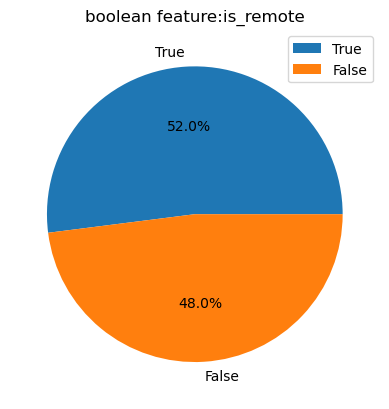

In [11]:
eda.boolPlot('is_remote')

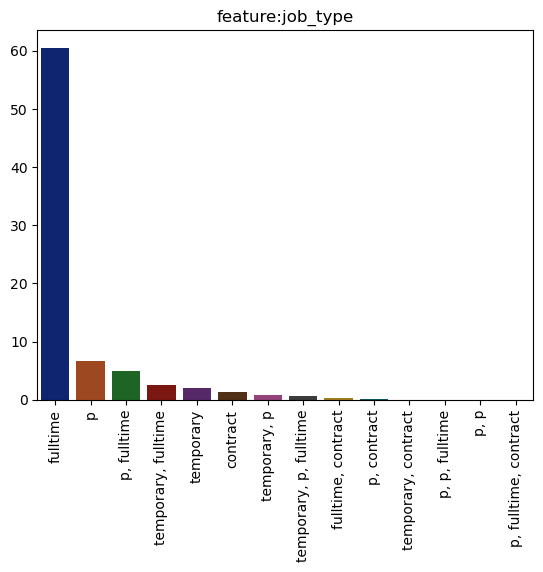

In [12]:
eda.barPlot('job_type')

#### EDA of Job Resume DataFrame

In [13]:
print('BASIC EDA FOR RESUME')
edaResume = EDABasic(df_Resume) # creating a class instance for Resume data frame

BASIC EDA FOR RESUME
-------------------------------------------------- 

SHAPE OF DATAFRAME:
Columns = 2484
Rows = 3
-------------------------------------------------- 

SIZE OF DATAFRAME: 7452
-------------------------------------------------- 

Checking the missing values:

Missing values:
file          0
profession    0
resume        0
dtype: int64
-------------------------------------------------- 

Checking the Duplicate values:
Duplicate values = No Duplicat values
-------------------------------------------------- 

The information: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2484 entries, 0 to 2483
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   file        2484 non-null   object
 1   profession  2484 non-null   object
 2   resume      2484 non-null   object
dtypes: object(3)
memory usage: 58.3+ KB
None 


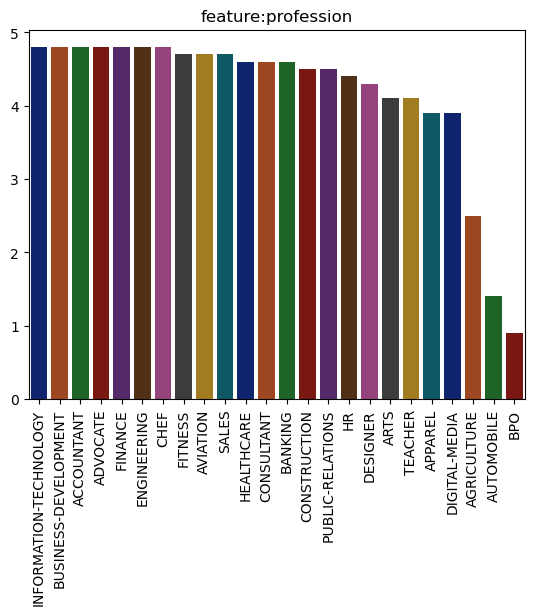

In [14]:
edaResume.barPlot('profession')

### 2. Text wrangling/cleaning
Let's create a class in charge of the following actions to clean our data sources:
- __Removing stopwords__ -> by using NLTK methods
- __Number removal__ -> by using Regex methods
- __Punctuation removal__ -> using String methods
- __Whitespace removal__ -> by using Regex methods

In [123]:
from nltk.corpus import stopwords
from nltk import word_tokenize
import re
import string

# class in charge of performing cleaning operations into raw text
class TextCleaning:
    def __init__(self):
        '''
            function: Constructor
            return: class instance
        '''
        self.STOPWORDS = stopwords.words('english') # set stopwords constant
        
    def remove_stopwords(self, text):
        '''
            function: remove_stopwords
            arg: text (str) -> text to perform the stopwords removal
            return: text (str) -> text without stopwords
        '''
        # tokenize the lowered case text
        tokenized_text = word_tokenize(text.lower())
        
        # loop through text words and remove stopwords
        i = 0
        while i < len(tokenized_text):
            # if word is a stopword remove from tokenized list
            if tokenized_text[i] in self.STOPWORDS:
                tokenized_text.pop(i)
                i -= 1
                continue
            i += 1
        return ' '.join(tokenized_text) # return string with remaining words joined by whitespace
    
    def remove_numbers(self, text, replace=''):
        '''
            function: remove_numbers
            arg: text (str) -> text to perform the numbers removal
                 replace (str) -> optional text to replace numbers with
            return: text (str) -> text without numbers
        '''
        # removing numbers from text using regex sub method
        return re.sub(r'\d+', replace, text)
    
    def remove_punctuation(self, text, replace=''):
        '''
            function: remove_punctuation
            arg: text (str) -> text to perform the punctuation removal
                 replace (str) -> optional text to replace punctuations with
            return: text (str) -> text without punctuation
        '''
        # removing punctuation from text using string methods
        return text.translate(str.maketrans(replace, replace, string.punctuation))
    
    def remove_whitespaces(self, text, replace=' '):
        '''
            function: remove_whitespaces
            arg: text (str) -> text to perform the whitespaces removal
                 replace (str) -> optional text to replace whitespaces with
            return: text (str) -> text without whitespaces
        '''
        # removing whitespaces from text using regex sub method
        return re.sub(r'\s+', ' ', text.strip())
        
tc = TextCleaning()
tc

In [124]:
# let's test some methods on our job descriptions
df_jobs['description'].apply(tc.remove_punctuation)

0        About us\n\nAt MRR we are proud that our essen...
1        Job Req ID 561\nDepartment Cash Management and...
2        Work Location\nToronto Ontario Canada\nHours\n...
3        Reporting to the Chief Financial Officer and o...
4        Who we are\n\n  \n\n\nImagine being part of a ...
                               ...                        
13541    CONTRACT  temporary position for less than a y...
13542    We are seeking a skilled SQL Developer and BI ...
13543    As a Business Analyst you will work at the int...
13544    Data Analyst Investment Data Analytics\nConnor...
13545    Job ID 30364\nJob Category Policy Planning  Re...
Name: description, Length: 13546, dtype: object

In [125]:
# let's test some methods on our job descriptions
df_jobs['description'].apply(tc.remove_whitespaces)

0        **About us** At MRR, we are proud that our ess...
1        **Job Req ID:** 561 **Department:** Cash Manag...
2        Work Location: Toronto, Ontario, Canada Hours:...
3        Reporting to the Chief Financial Officer and o...
4        **Who we are** Imagine being part of a team wh...
                               ...                        
13541    **CONTRACT -** temporary position for less tha...
13542    We are seeking a skilled SQL Developer and BI ...
13543    As a Business Analyst, you will work at the in...
13544    **Data Analyst, Investment Data Analytics** **...
13545    **Job ID:** 30364 **Job Category:** Policy, Pl...
Name: description, Length: 13546, dtype: object

In [126]:
# Let's clean our resumes and job descriptions
def clean_text_column(df_original, col, stops=True, numbers=True, punctuations=True, whitespaces=True):
    
    tc = TextCleaning() # instantiate text cleaning class
    df = df_original[col].copy() # copy of the column for safety
    
    # perform actions depending on each flags
    if stops: 
        df = df.apply(tc.remove_stopwords)
    if numbers:
        df = df.apply(tc.remove_numbers)
    if punctuations:
        df = df.apply(tc.remove_punctuation)
    if whitespaces:
        df = df.apply(tc.remove_whitespaces)
        
    return df # return copy of the column after operations

In [127]:
# clean the job descriptions texts
df_jobs['description_clean'] = clean_text_column(df_jobs, 'description')
df_jobs[['description_clean', 'search_term']]

,description_clean
0,us mrr proud essential services technologies d...
1,job req id department cash management investme...
2,work location toronto ontario canada hours lin...
3,reporting chief financial officer principals c...
4,imagine part team human connection underlies e...
...,...
13541,contract temporary position less year summary ...
13542,seeking skilled sql developer bi business inte...
13543,business analyst work intersection finance ope...
13544,data analyst investment data analytics connor ...


In [89]:
# clean the resumes texts
df_resumes['resume_clean'] = clean_text_column(df_resumes, 'resume')
df_resumes[['resume_clean', 'profession']]

,resume_clean
0,accountant summary financial accountant specia...
1,staff accountant summary highly analytical det...
2,accountant professional summary obtain positio...
3,senior accountant experience company name june...
4,senior accountant professional summary senior ...
...,...
2479,reading teacher summary highly motivated educa...
2480,history teacher professional summary employed ...
2481,teacher summary highly ethical dependable dili...
2482,teacher summary talented early education profe...


### 3. Verbs simmilarity

Now that the texts are clean, let's proceed with the first feature of our tool and find the verbs simmilarity between the resumes and job descriptions.

We will test and compare both approaches for the verbs:
- __Stemming__
- __Lemmatization__

In [128]:
from textblob import TextBlob
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer

class VerbsAnalyzer():
    def get_unique_words(self, text, print_=True):
        '''
            function: get_unique_words -> function to identify unique words from a text
            arg: text (str) -> raw text
                 print_ (bool) -> print (or not) additional information of the process
            return: unique_words (list) -> list of unique words from the text
        '''
        tokens = word_tokenize(text)
        unique_words = list(set(tokens))
        if print_:
            print("# Total words:", len(tokens))
            print("# Unique words:", len(unique_words))
        return unique_words
    
    def get_verbs(self, words, pos_prefix='V'):
        '''
            function: get_verbs -> this function identify verbs from the list of words by using part of speech tags
            arg: words (list) -> list of words
                 pos_prefix (str) -> prefix of the required pos tags, 'V' by default to identify verbs only
            return: tags (list) -> (word, pos tag) if the POS tag starts with the parameter pos_prefix
        '''
        text = ' '.join(words) # joining tokens into one text
        blob = TextBlob(text) # pos tagging words from text
        # identifying and returning only verbs from POS tags
        return [tag for tag in blob.tags if tag[1].startswith(pos_prefix)]
    
    def stem_verbs(self, words):
        '''
            function: stem_verbs -> apply stemming to a list of words
            arg: words (list) -> list of words
            return: (list) -> words after stemming
        '''
        stemmer = PorterStemmer() # instantiate stemmer
        return [stemmer.stem(word) for word in words] # apply stemming on all words
    
    def lemmatize_verbs(self, words, pos="v"):
        '''
            function: lemmatize_verbs -> apply lemmatization to a list of words
            arg: words (list) -> list of words
            return: (list) -> words after lemmatization
        '''
        lem = WordNetLemmatizer() # instantiate lemmatizer
        return [lem.lemmatize(word, pos=pos) for word in words] # apply lemmatization on all words

In [170]:
# function to extract verbs from text, apply a method and return list of only verbs with the method applied
def get_processed_verbs_from_text(text, method='stem', print_=True):
    
    va = VerbsAnalyzer() # instantiate our class
    unique_words = va.get_unique_words(text, print_=print_) # get resume unique words
    pos_verbs = va.get_verbs(unique_words) # extract only verbs from both
    
    if print_: # print insights if required
        print("# Original verbs:", len(pos_verbs))
        print("  Original Verbs (trimmed):")
        display(pos_verbs[:5])
        
    verbs = [verb[0] for verb in pos_verbs] # get only verbs without POS tags
    
    # apply technique over verbs and return processed list
    if method == 'stem':
        processed_verbs = va.stem_verbs(verbs)
    elif method == 'lemmatize':
        processed_verbs = va.lemmatize_verbs(verbs)
        
    if print_: # print insights if required
        print("# Unique verbs:", len(list(set(processed_verbs))))
        print("  Processed Verbs (trimmed):")
        display(processed_verbs[:5])
    
    return list(set(processed_verbs)) # return only unique verbs

In [161]:
# Let's test our function using one random resume and STEMMING
test_resume = df_resumes['resume_clean'][0]
_ = get_processed_verbs_from_text(test_resume, method='stem', print_=True)

# Total words: 2198
# Unique words: 891
# Original verbs: 225
  Original Verbs (trimmed):


[('providing', 'VBG'),
 ('carried', 'VBD'),
 ('briefed', 'VBD'),
 ('procure', 'VBP'),
 ('developdeploy', 'VBP')]

# Unique verbs: 187
  Processed Verbs (trimmed):


['provid', 'carri', 'brief', 'procur', 'developdeploy']

In [166]:
# Let's test our function using one random job and STEMMING
test_job = df_jobs['description_clean'][0]
_ = get_processed_verbs_from_text(test_job, method='stem', print_=True)

# Total words: 371
# Unique words: 273
# Original verbs: 55
  Original Verbs (trimmed):


[('providing', 'VBG'),
 ('using', 'VBG'),
 ('recycling', 'VBG'),
 ('learning', 'VBG'),
 ('experienced', 'VBD')]

# Unique verbs: 50
  Processed Verbs (trimmed):


['provid', 'use', 'recycl', 'learn', 'experienc']

In [164]:
# Let's test our function using one random resume and LEMMATIZATION
test_resume = df_resumes['resume_clean'][0]
_ = get_processed_verbs_from_text(test_resume, method='lemmatize', print_=True)

# Total words: 2198
# Unique words: 891
# Original verbs: 225
  Original Verbs (trimmed):


[('providing', 'VBG'),
 ('carried', 'VBD'),
 ('briefed', 'VBD'),
 ('procure', 'VBP'),
 ('developdeploy', 'VBP')]

# Unique verbs: 189
  Processed Verbs (trimmed):


['provide', 'carry', 'brief', 'procure', 'developdeploy']

In [165]:
# Let's test our function using one random job and LEMMATIZATION
test_job = df_jobs['description_clean'][0]
_ = get_processed_verbs_from_text(test_job, method='lemmatize', print_=True)

# Total words: 371
# Unique words: 273
# Original verbs: 55
  Original Verbs (trimmed):


[('providing', 'VBG'),
 ('using', 'VBG'),
 ('recycling', 'VBG'),
 ('learning', 'VBG'),
 ('experienced', 'VBD')]

# Unique verbs: 50
  Processed Verbs (trimmed):


['provide', 'use', 'recycle', 'learn', 'experience']

Now we can __compare the verbs from both texts__ and create a __metric for simmilarity.__

Overall we identify the following:

- __Simmilarity__: number of common verbs / number of verbs in job description
- __Common verbs__: between resume and job description
- __Lacking verbs__: verbs present in the job description that are NOT present in the resume

In [189]:
# function to calculate verbs simmilarity between 2 texts, common & lacking verbs
def get_verbs_simmilarity(text_resume, text_job, method='stem', print_=True):
    # extract and process verbs from both texts
    verbs_resume = get_processed_verbs_from_text(text_resume, method=method, print_=False)
    verbs_job = get_processed_verbs_from_text(text_job, method=method, print_=False)
    
    # get common verbs between both texts
    verbs_common = [verb for verb in verbs_resume if verb in verbs_job]
    
    # get lacking verbs (present in job description, but not in resume)
    verbs_lacking = [verb for verb in verbs_job if verb not in verbs_resume]
    
    # calculate, print, and return simmilarity
    simmilarity = len(verbs_common) * 100 / len(verbs_job)
    if print_: 
        print("% Verbs Simmilarity: {:.2f}".format(simmilarity))
        print("Common Verbs (trimmed):")
        display(verbs_common[:5])
        print("Lacking Verbs (trimmed):")
        display(verbs_lacking[:5])
    return simmilarity, verbs_common, verbs_lacking

Let's test our function using __Stemming and Lemmatization__

In [191]:
test_resume = df_resumes['resume_clean'][0]
test_job = df_jobs['description_clean'][0]
sim, common, lacking = get_verbs_simmilarity(test_resume, test_job, method='stem')

% Verbs Simmilarity: 32.00
Common Verbs (trimmed):


['expect', 'use', 'report', 'ensur', 'identifi']

Lacking Verbs (trimmed):


['cpa', 'implement', 'park', 'impact', 'believ']

In [192]:
test_resume = df_resumes['resume_clean'][0]
test_job = df_jobs['description_clean'][0]
sim, common, lacking = get_verbs_simmilarity(test_resume, test_job, method='lemmatize')

% Verbs Simmilarity: 36.00
Common Verbs (trimmed):


['collaborate', 'expect', 'use', 'report', 'create']

Lacking Verbs (trimmed):


['cpa', 'implement', 'accurate', 'impact', 'park']

Now, to __compare both methods__ let's choose 1 job description and calculate simmilarities using

all resumes targeted for that job description industry.

In [267]:
# display the available industries that we have from job descriptions
df_jobs['search_term'].value_counts()

accountant                500
advocate                  500
data scientist            500
software developer        500
software engineer         500
teacher                   500
sales                     500
public relations          500
information technology    500
hr                        500
healthcare                500
fitness                   500
finance                   500
engineering               500
digital media             500
designer                  500
consultant                500
construction              500
chef                      500
business development      500
banking                   500
aviation                  500
automobile                500
arts                      500
apparel                   500
agriculture               500
data analyst              500
bpo                        46
Name: search_term, dtype: int64

We have multiple industry job descriptions. 

Let's compare the verb simmilarity for each industry, between resumes and job descriptions.

In [266]:
# display the available industries that we have from resumes
df_resumes['profession'].unique()

array(['ACCOUNTANT', 'ADVOCATE', 'AGRICULTURE', 'APPAREL', 'ARTS',
       'AUTOMOBILE', 'AVIATION', 'BANKING', 'BPO', 'BUSINESS-DEVELOPMENT',
       'CHEF', 'CONSTRUCTION', 'CONSULTANT', 'DESIGNER', 'DIGITAL-MEDIA',
       'ENGINEERING', 'FINANCE', 'FITNESS', 'HEALTHCARE', 'HR',
       'INFORMATION-TECHNOLOGY', 'PUBLIC-RELATIONS', 'SALES', 'TEACHER'],
      dtype=object)

In [268]:
# Function to calculate the simmilarity between a job description text and a list of resumes
def get_verb_simmilarity_lists(job_text, resumes):
    # calculate simmilarities (with both methods) between the resumes and same job description
    sims_stem = []
    sims_lemmatize= []
    for resume_text in resumes:
        # calculate verb simmilarities and save values
        sim_stem, _, _ = get_verbs_simmilarity(resume_text, job_text, method='stem', print_=False)
        sim_lemm, _, _ = get_verbs_simmilarity(resume_text, job_text, method='lemmatize', print_=False)
        sims_stem.append(sim_stem)
        sims_lemmatize.append(sim_lemm)
    return sims_stem, sims_lemmatize

In [269]:
import matplotlib.pyplot as plt

# Function to plot the simmilarity lines and difference from the lists returned by previous function
def plot_verb_simmilarity_comparison(sims_stem, sims_lemmatize, title=''):
    # calculate the difference between metrics
    sims_difference = [sim[1]-sim[0] for sim in zip(sims_stem, sims_lemmatize)]
    
    # plot lines simmilarities (from stem and lemmatize) and difference between both (gray)
    plt.plot(sims_stem, color='red', label='Stemming')
    plt.plot(sims_lemmatize, '-.', color='blue', label='Lemmatizing')
    plt.plot(sims_difference, color='gray', label='Difference')
    plt.title(title + "Verb simmilarity: Stemming vs Lemmatizing verbs")
    plt.xlabel("Resume ID")
    plt.ylabel("Verb Simmilarity %")
    plt.legend()
    plt.show()

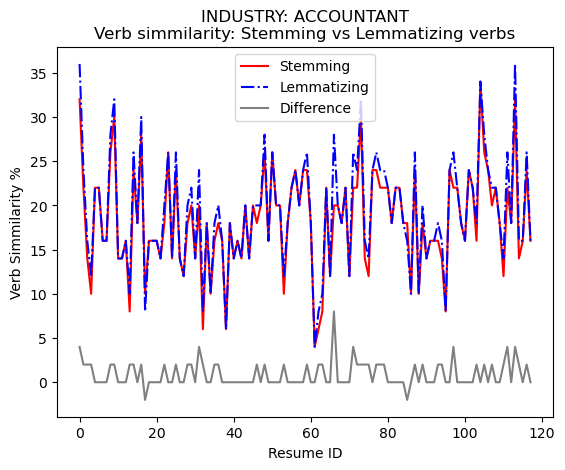

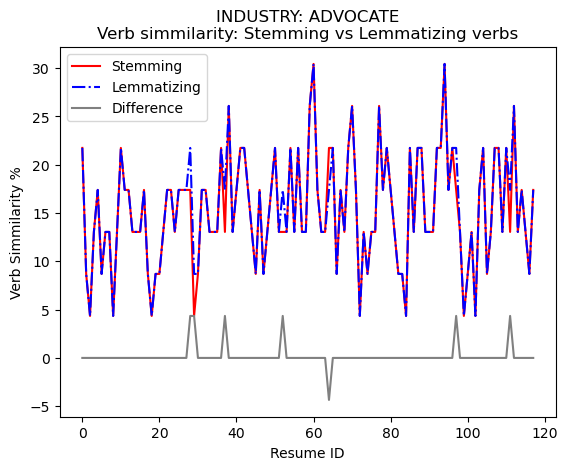

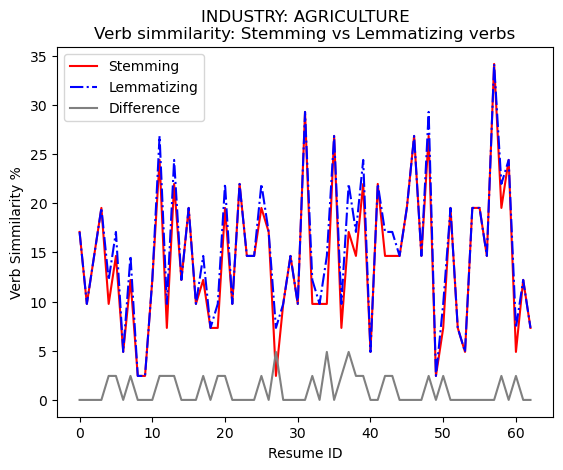

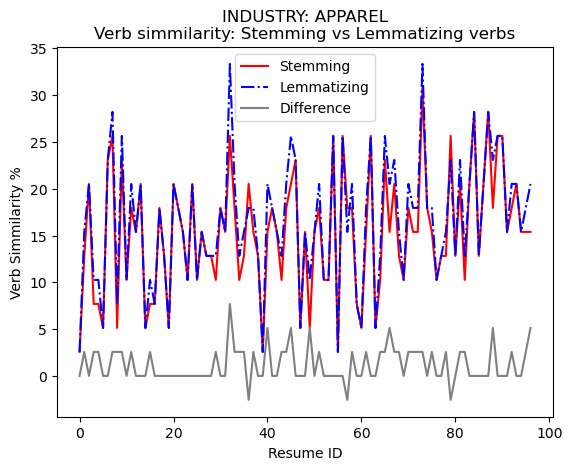

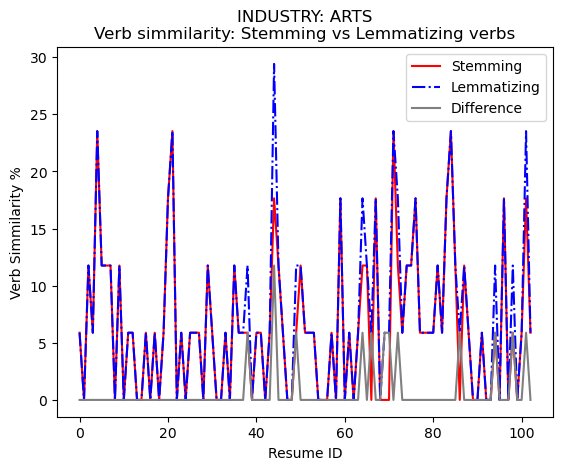

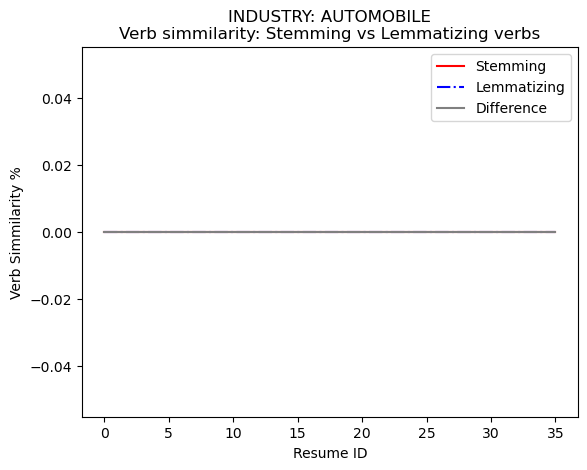

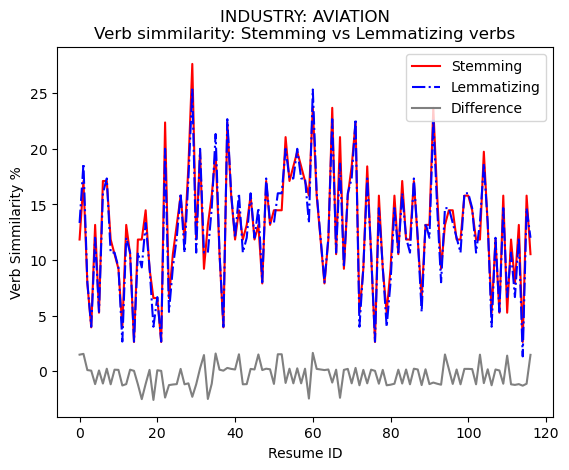

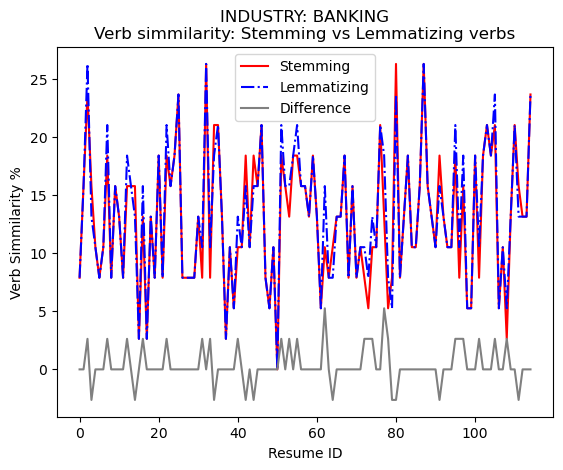

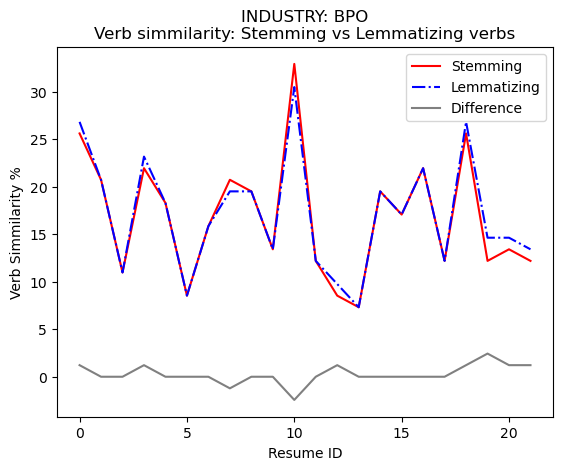

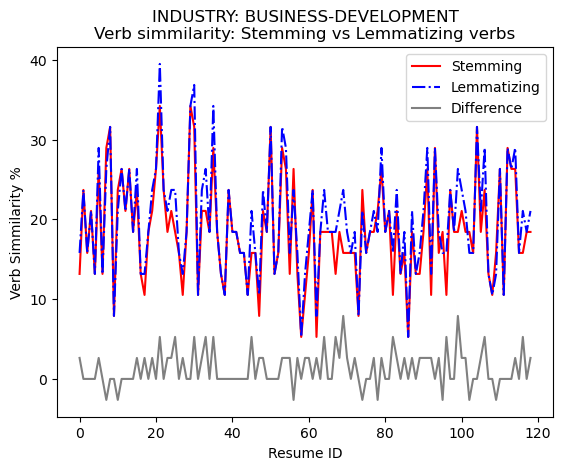

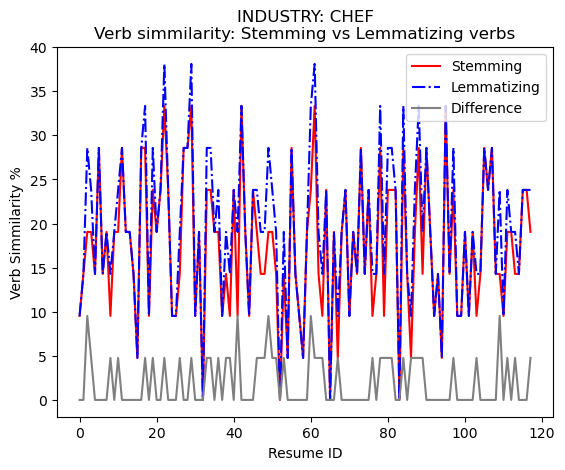

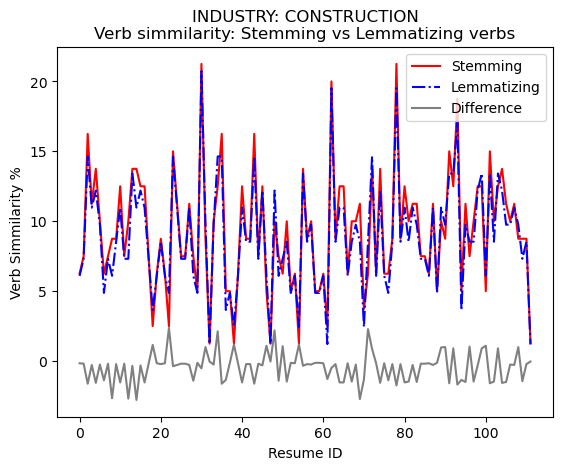

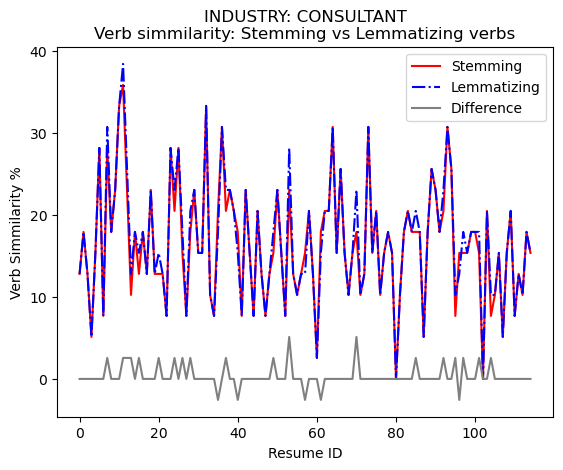

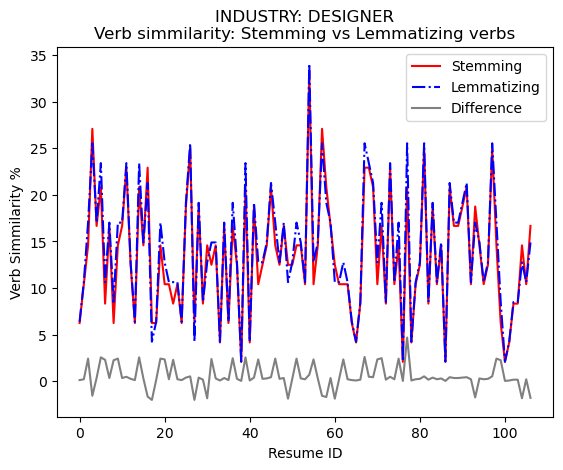

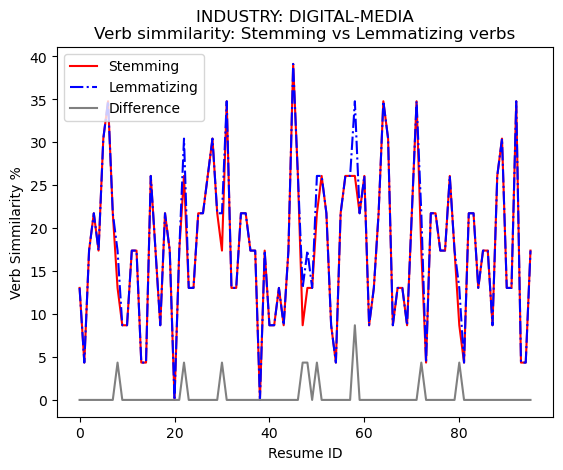

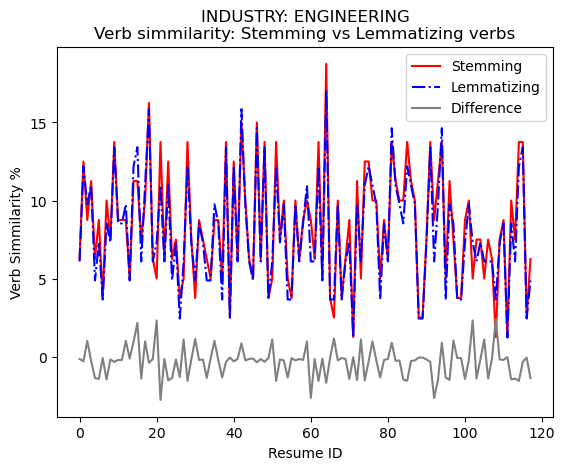

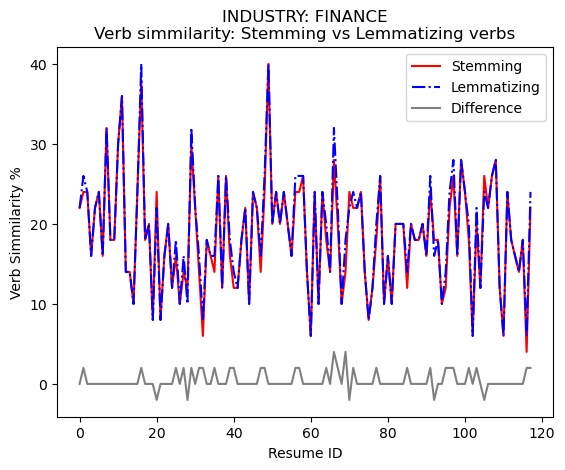

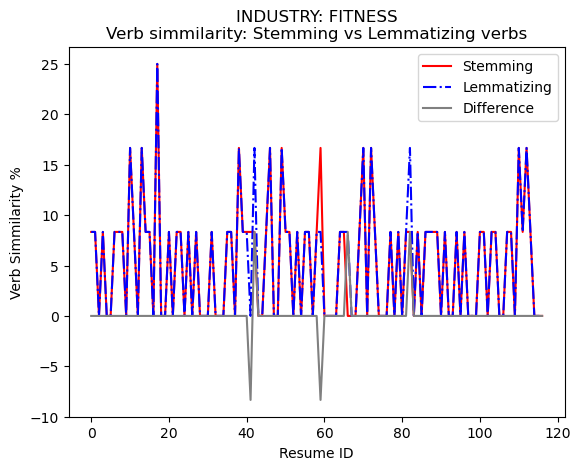

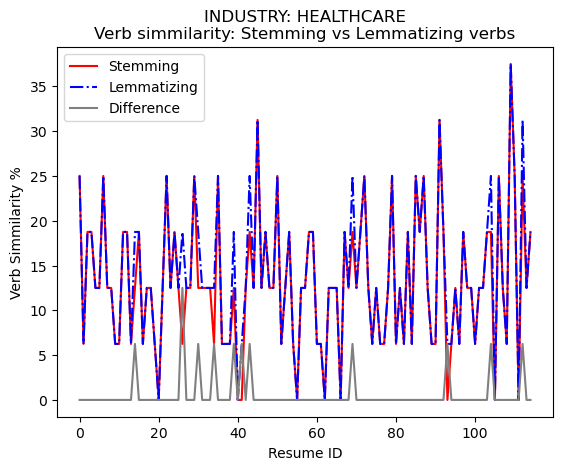

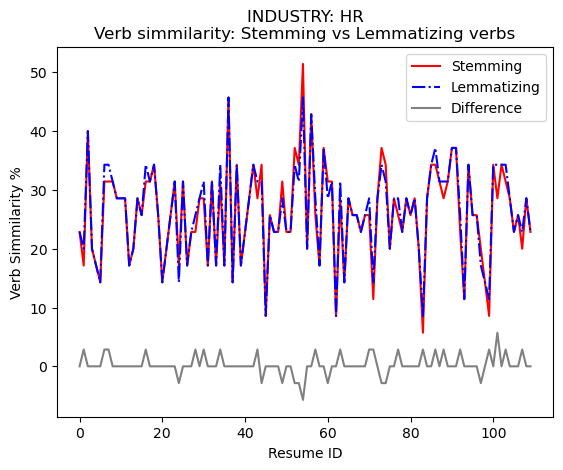

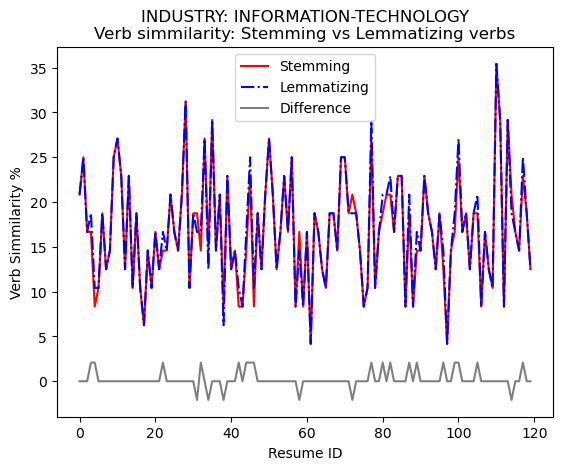

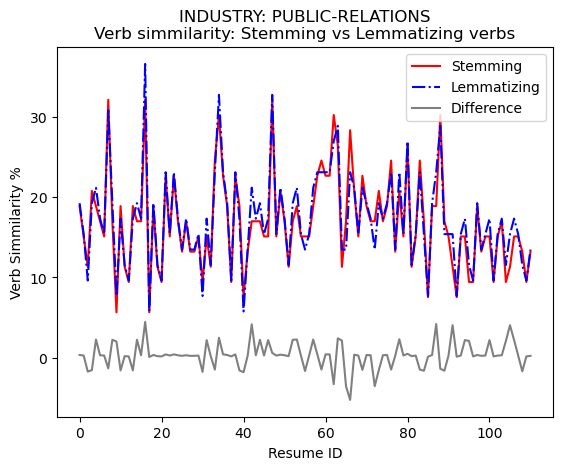

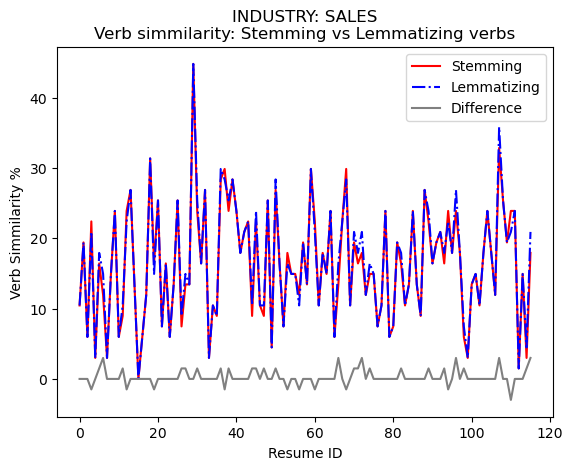

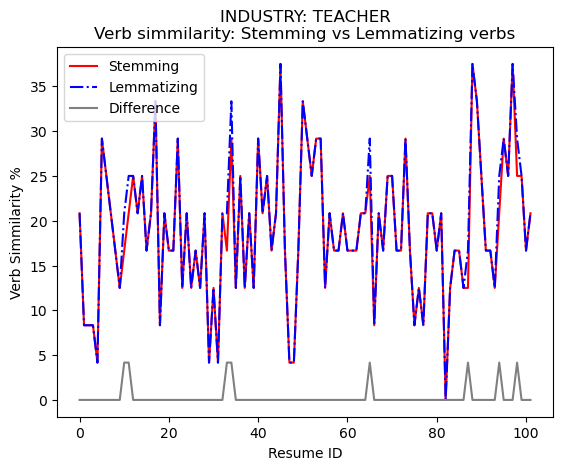

In [264]:
# Function to calculate and compare all simmilarities between 1 random industry job description and all available resumes for that industry
def compare_verb_simmilarities(df_resumes, df_jobs, trim=5):
    # loop through industries
    for industry in df_resumes['profession'].unique():
        # small text change for the job description dataset
        industry_job = industry.lower().replace('-', ' ')
        # take 1 random industry job description from dataset
        job_text = df_jobs[df_jobs['search_term'] == industry_job]['description_clean'].reset_index(drop=True)[0]
        # get all resumes from that industry
        resumes = df_resumes[df_resumes['profession'] == industry]['resume_clean'].reset_index(drop=True)
        
        # get simmilarities and plot for visualization
        sims_stem, sims_lemmatize = get_verb_simmilarity_lists(job_text, resumes)
        plot_verb_simmilarity_comparison(sims_stem, sims_lemmatize, title='INDUSTRY: ' + industry + '\n')
            

compare_verb_simmilarities(df_resumes, df_jobs)

__From the resultant plots, we notice:__
- Overall the verb simmilarity values don't change significantly when using both methods.
- Given that the difference (Lemmatizing minus Stemming) is always positive, the plots suggests that Lemmatizing verbs increases the verb simmilarity (to the job description) in most resumes.
- Very few cases present negative difference, meaning that stemming has increased those particular resume verb simmilarity to the job description.

### 4. Action verbs recommendation

In the previous step we also identified:
- common verbs between the resumes and job descriptions.
- lacking verbs: verbs that are present in the job description but NOT in the resume

Using this information we can __suggest__ our users possible __verbs to add__ to their resumes by using:
- identifying POS
- Synonyms & Antonyms (WordNet -> Synsets)

We can also __rank our synonym suggestions by using__:
- Simmilarity between words (Synsets)

In [22]:
class Preprocessing:
    def __init__(self, df):
        '''
            function: Constructor
            arg: df (pandas.core.frame.DataFrame) -> dataframe to perform EDA
            return: None
        '''
        self.df = df
        
    def textPreprocessing(self, textData):
        '''
            function: textPreprocessing -> This function will preprocess the text data
            arg: textData (str) -> The givine string
            return: processedText (str) -> Preprocessed data 
                    tags -> part of speech tags
        '''
        textData = textData.lower() # converting text in to lower cases
        
        textData = re.sub(r'[^a-zA-Z0-9\s]',' ', textData) # removing all the special characters from the text
        
#         sentTokenizeList = sent_tokenize(textData)
        # creating the list of the stop words.
        # job posts contains french and English text 
        stopWordsEng = set(stopwords.words('english'))
        stopWordsFre = set(stopwords.words('french'))
        
        # creating an instance for the lemmatization
        lemmetizing = WordNetLemmatizer()
        processedSentList = []
        wordTokenized = word_tokenize(textData)
        tokens = [word for word in wordTokenized if word not in stopWordsEng] # removing English stop words
        tokens = [word for word in wordTokenized if word not in stopWordsFre] # removing French stop words
        
#         lemmatizedTokens = [lemmetizing.lemmatize(word, pos='V') for word in tokens] # converting text into it's root form
        processedText = ' '.join(tokens)
        
#         blob = TextBlob(' '.join(tokens)) # pos tagging words
#         tags = [tag for tag in blob.tags if tag[1].startswith('v')]
        
        return  processedText # pd.Series([processedText, tags])
    
    def textEDA(self):
        '''
            function: textEDA -> This function will disply word clouds for remot and In person jobs
            arg: None
            return: None
        '''
        remotDf = self.df[self.df['is_remote'] == True] # Datafreme that contains only remote jobs
        NonremotDf = self.df[self.df['is_remote'] == False] # Datafreme that contains only In-person jobs
        
        self.printLine()
        print('Word colud for Remot Jobs')
        self.printLine()
        text_isRemot = remotDf['preprocessedText'].str.cat(sep=' ')
        # Word cloud creation for remot jobs
        isRemot_wordcloud = WordCloud(width=800, height=500,background_color='black').generate(text_isRemot) 
        plt.imshow(isRemot_wordcloud, interpolation='bilinear')
        plt.axis('off')
        plt.show()
        
        self.printLine()
        print('Word colud for In-person jobs')
        self.printLine()
        text_isNotRemot = NonremotDf['preprocessedText'].str.cat(sep=' ')   
        # Word cloud creation for In-person jobs
        isNotRemot_wordcloud = WordCloud(width=800, height=500,background_color='black').generate(text_isNotRemot)
        plt.imshow(isNotRemot_wordcloud, interpolation='bilinear')
        plt.axis('off')
        plt.show()
    
    def droppingColumns(self):
        '''
            function: droppingColumns -> This function will drop all the unnecessary columns 
            arg: None
            return: None
        '''
        '''
            All of the columns are not necessary and also have high rate of missing values, 
            so these will not be beneficial for the anaysis and prediction
            site -> The site from where the data is scrapped (Fixed value -> indeed)
            emails -> Email of the contact preson for the job inquiry
            job_url_direct -> URL for job application
            company_url -> URL for company site
            company_url_direct -> URL for job application on company's site
            logo_photo_url -> URL for logo of the company
            banner_photo_url -> URL for logo of the company
            ceo_photo_url -> URL for CEO's phot
            company_addresses -> Address of the company
            company_num_employees -> number of employees in the company
            company_revenue -> the revenue generated by company
            company_description -> details of the company
            ceo_name -> name of the company CEO
            date_posted -> date of the job posted 
            company_industry -> Domain of the company
        '''
        '''
            All of these columns are not useful due to the high percentage of missing vlaues 
            interval
            min_amount 
            max_amount
            currency
        '''
        cols = ['site', 'job_url', 'job_url_direct', 'interval', 'min_amount', 'max_amount','currency','emails', 'company_url', 
                'company_url_direct', 'logo_photo_url', 'banner_photo_url', 'ceo_photo_url', 'company_addresses', 
                'company_num_employees', 'company_revenue', 'company_description', 'company_description', 'ceo_name',
                'date_posted', 'company_industry']
        self.df.drop(columns=cols, inplace=True)
        
    def dropDuplicates(self):
        '''
            function: dropDuplicates -> This function will drop duplicates
            arg: None
            return: None
        '''
        # dropping duplicates 
        self.df.drop_duplicates(inplace=True)
    
    def CatlabelEncoding(self, column):
        '''
            function: labelEncoding -> performs label encoding on the catagorical columns
            arg: column (List) -> List of the names of the columns 
            return: None
        '''
        labelEncoder = LabelEncoder()
        for col in column:
            self.df[col] = labelEncoder.fit_transform(self.df[col])

    def printLine(self):
        '''
            function: printLine -> This function will provide the print format for the class output
            arg: None
            return: None
        '''
        # creting the print format
        print('-'*120)


In [16]:
preprocess = Preprocessing(dfJobDes)

In [17]:
# dfJobDes[['preprocessedText', 'JobVerbs']] = dfJobDes['description'].apply(preprocess.textPreprocessing)
dfJobDes['preprocessedText'] = dfJobDes['description'].apply(preprocess.textPreprocessing)

In [18]:
preprocess.droppingColumns()

In [19]:
preprocess.dropDuplicates()

------------------------------------------------------------------------------------------------------------------------
Word colud for Remot Jobs
------------------------------------------------------------------------------------------------------------------------


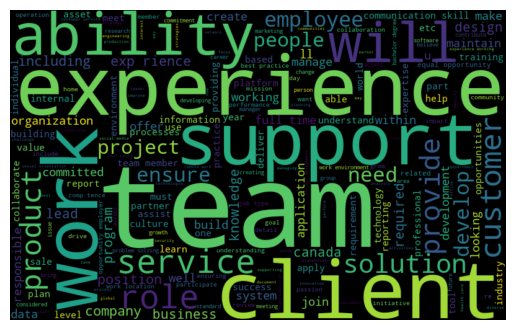

------------------------------------------------------------------------------------------------------------------------
Word colud for In-person jobs
------------------------------------------------------------------------------------------------------------------------


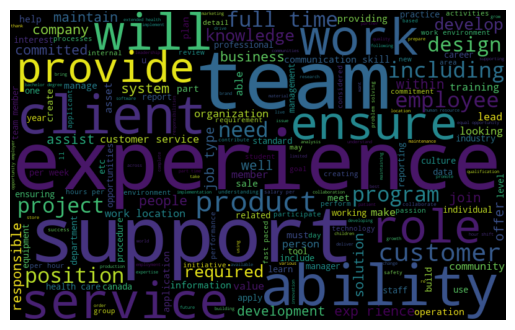

In [20]:
preprocess.textEDA()

In [21]:
preprocess.CatlabelEncoding(['is_remote'])

In [22]:
dfJobDes.tail(1)

,title,company,location,job_type,is_remote,description,preprocessedText
11440,database analyst,Meta Connections Inc.,"Chilliwack, BC, CA",fulltime,0,* Education:\n* Expérience:\n**Education**\n--...,education exp rience education college cegep o...


In [23]:
preprocessResume = Preprocessing(df_Resume)

In [24]:
df_Resume['preprocessedText'] = df_Resume['resume'].apply(preprocess.textPreprocessing)

In [25]:
df_Resume.tail()

,file,profession,resume,preprocessedText
2479,86322251.pdf,TEACHER,READING TEACHER\nSummary\nI am a highly motiva...,reading teacher summary i am a highly motivate...
2480,86597425.pdf,TEACHER,HISTORY TEACHER\nProfessional Summary\nTo be e...,history teacher professional summary to be emp...
2481,90363254.pdf,TEACHER,"TEACHER\nSummary\nHighly ethical, dependable, ...",teacher summary highly ethical dependable and ...
2482,96547039.pdf,TEACHER,TEACHER\nSummary\nTalented early education pro...,teacher summary talented early education profe...
2483,99244405.pdf,TEACHER,Kpandipou Koffi\nSummary\nCompassionate teachi...,kpandipou koffi summary compassionate teaching...


### Verbs simmilarity analysis 

### n-grams Similarity analysis

In [31]:
class nGrams:
    def __init__(self, text):
        self.text = text
        
    def clean_text_without_lowering(self):
        '''
            function: clean_text_without_lowering -> this function will clean the text 
            arg: None
            return: finalTokens (str) -> cleaned text
        '''
        self.text = ' '.join(self.text)
        self.text = self.text.translate(str.maketrans('', '', string.punctuation)) # remove punctuation
        tokens = word_tokenize(self.text) # tokenize words
        sw = stopwords.words('english') # remove stopwords
        tokens = [w for w in tokens if w.lower() not in sw]
        tokens = [w for w in tokens if not w.isdigit()] # remove digits/numbers
        finalTokens = ' '.join(tokens)
        return finalTokens
    
    def get_top_n_bigrams(self, tokens, n):
        '''
            function: get_top_n_bigrams -> finds the bigrams 
            arg: tokens (str) -> text to find the bigrams 
                 n (int) -> top bigram number
            return: bigrams (list) -> list of tuple containg bigrams
        '''
        bcf = BigramCollocationFinder.from_words(tokens) # instantiate bigram finder
        bigrams = bcf.nbest(BigramAssocMeasures.likelihood_ratio, n) # get top n bigrams
        return bigrams
    
    def get_top_n_trigrams(self, tokens, n):
        '''
            function: get_top_n_trigrams -> finds the trigrams 
            arg: tokens (str) -> text to find the trigrams 
                 n (int) -> top trigrams number
            return: bigrams (list) -> list of tuple containg trigrams
        '''
        tcf = TrigramCollocationFinder.from_words(tokens) # instantiate bigram finder
        trigrams = tcf.nbest(TrigramAssocMeasures.likelihood_ratio, n) # get top n bigrams
        return trigrams

In [32]:
textJobs = dfJobDes['preprocessedText'] 
ngramsJobs = nGrams(textJobs) # class instance for jobs

textResume= df_Resume['preprocessedText'] # resume text
ngramsResume = nGrams(textResume) # class instance for Resume

In [33]:
# fectching the clean text
textJobs = ngramsJobs.clean_text_without_lowering()  # job description
textResume = ngramsResume.clean_text_without_lowering() # Resume

#### Bigrams simmilarity analysis

In [34]:
# featching the list of bigrams for jobs
bigrams_jobdesc = ngramsJobs.get_top_n_bigrams(word_tokenize(textJobs), 20)
print('Bigrams for jobs: ', bigrams_jobdesc)

Bigrams for jobs:  [('exp', 'rience'), ('full', 'time'), ('monday', 'friday'), ('fast', 'paced'), ('problem', 'solving'), ('comp', 'tences'), ('bachelor', 'degree'), ('equal', 'opportunity'), ('communication', 'skills'), ('attention', 'detail'), ('sexual', 'orientation'), ('per', 'week'), ('salary', 'per'), ('opportunity', 'employer'), ('customer', 'service'), ('work', 'location'), ('team', 'members'), ('social', 'media'), ('best', 'practices'), ('long', 'term')]


In [35]:
# featching the list of bigrams for resumes
bigrams_resume = ngramsResume.get_top_n_bigrams(word_tokenize(textResume), 1000)
print(len(bigrams_resume))
print('bigrams for Resume: ', bigrams_resume[:10])

1000
bigrams for Resume:  [('city', 'state'), ('company', 'name'), ('name', 'city'), ('customer', 'service'), ('problem', 'solving'), ('high', 'school'), ('microsoft', 'office'), ('human', 'resources'), ('public', 'relations'), ('social', 'media')]


In [36]:
bigrams_jobdesc_lowered = [tuple(map(str.lower, bigram)) for bigram in bigrams_jobdesc]
bigrams_resume_lowered = [tuple(map(str.lower, bigram)) for bigram in bigrams_resume]
bigrams_jobdesc_lowered[:10]

[('exp', 'rience'),
 ('full', 'time'),
 ('monday', 'friday'),
 ('fast', 'paced'),
 ('problem', 'solving'),
 ('comp', 'tences'),
 ('bachelor', 'degree'),
 ('equal', 'opportunity'),
 ('communication', 'skills'),
 ('attention', 'detail')]

In [37]:
common_bigrams = [b for b in bigrams_resume_lowered if b in bigrams_jobdesc_lowered]

print("% bigrams simmilarity: {:.2f}".format(len(common_bigrams) * 100 / len(bigrams_jobdesc_lowered)))
common_bigrams

% bigrams simmilarity: 60.00


[('customer', 'service'),
 ('problem', 'solving'),
 ('social', 'media'),
 ('communication', 'skills'),
 ('long', 'term'),
 ('fast', 'paced'),
 ('attention', 'detail'),
 ('team', 'members'),
 ('best', 'practices'),
 ('per', 'week'),
 ('full', 'time'),
 ('bachelor', 'degree')]

#### Trigrams simmilarity analysis

In [38]:
# featching the list of trigrams for jobs
trigrams_jobdesc = ngramsJobs.get_top_n_trigrams(word_tokenize(textJobs), 20)
trigrams_jobdesc

[('ans', 'exp', 'rience'),
 ('education', 'exp', 'rience'),
 ('exp', 'rience', 'education'),
 ('ann', 'exp', 'rience'),
 ('exp', 'rience', 'pertinente'),
 ('souhait', 'exp', 'rience'),
 ('exp', 'rience', 'professionnelle'),
 ('exp', 'rience', 'domaine'),
 ('exp', 'rience', 'gestion'),
 ('exp', 'rience', 'travail'),
 ('formation', 'exp', 'rience'),
 ('atout', 'exp', 'rience'),
 ('exp', 'rience', 'invit'),
 ('selon', 'exp', 'rience'),
 ('exp', 'rience', 'comptabilit'),
 ('exp', 'rience', 'client'),
 ('offrir', 'exp', 'rience'),
 ('exp', 'rience', 'vente'),
 ('obligatoire', 'exp', 'rience'),
 ('exp', 'rience', 'av')]

In [39]:
# featching the list of trigrams for resume
trigrams_resume = ngramsResume.get_top_n_trigrams(word_tokenize(textResume), 20)
len(trigrams_resume)
trigrams_resume[:10]

[('name', 'city', 'state'),
 ('company', 'name', 'city'),
 ('university', 'city', 'state'),
 ('city', 'state', 'usa'),
 ('city', 'state', 'university'),
 ('college', 'city', 'state'),
 ('city', 'state', 'responsible'),
 ('city', 'state', 'us'),
 ('city', 'state', 'united'),
 ('school', 'city', 'state')]

In [40]:
trigrams_jobdesc_lowered = [tuple(map(str.lower, trigram)) for trigram in trigrams_jobdesc]
trigrams_resume_lowered = [tuple(map(str.lower, trigram)) for trigram in trigrams_resume]
trigrams_jobdesc_lowered[:10]

[('ans', 'exp', 'rience'),
 ('education', 'exp', 'rience'),
 ('exp', 'rience', 'education'),
 ('ann', 'exp', 'rience'),
 ('exp', 'rience', 'pertinente'),
 ('souhait', 'exp', 'rience'),
 ('exp', 'rience', 'professionnelle'),
 ('exp', 'rience', 'domaine'),
 ('exp', 'rience', 'gestion'),
 ('exp', 'rience', 'travail')]

In [41]:
common_trigrams = [b for b in trigrams_resume_lowered if b in trigrams_jobdesc_lowered]

print("% trigrams simmilarity: {:.2f}".format(len(common_trigrams) * 100 / len(trigrams_jobdesc_lowered)))
common_trigrams

% trigrams simmilarity: 0.00


[]

### Cosine simmilarity analysis (Resume entries VS Job description entries)

In [42]:
def tfidfVectorizor(text):
    tfidf = TfidfVectorizer(min_df=1, stop_words="english")
    feature_matrix = tfidf.fit_transform(text)
    col_names = tfidf.get_feature_names_out()
    arr = feature_matrix.toarray()
    df_ = pd.DataFrame(arr, columns = col_names)
    return df_

In [43]:
df_jobdesc = tfidfVectorizor(dfJobDes['preprocessedText'])

In [44]:
df_resume = tfidfVectorizor(df_Resume['preprocessedText'])

In [45]:
df_concat = pd.concat([df_jobdesc, df_resume], ignore_index=True)
df_concat = df_concat.fillna(0.0)
df_concat = df_concat.iloc[:, : df_jobdesc.shape[1]]

In [46]:
df_resume_concat = df_concat.iloc[-len(df_resume):]
df_resume_concat.reset_index(drop=True, inplace=True)

In [47]:
df_jobdesc

,00,000,0000,00012,0003,00033,00042368,00055236,00056302,00056313,...,zuora,zustand,zweig,zwicker,zxnhr8bsjd,zynga,zyqqxsubye,zytec,zzg,zzz
0,0.057257,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.089001,0.092093,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.074228,0.115210,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.033520,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9089,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9090,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9091,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9092,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [48]:
matrix_jobdesc = spicy.sparse.csr_matrix(df_jobdesc.values)
matrix_resume = spicy.sparse.csr_matrix(df_resume_concat.values)

print("Job Description matrix shape:", matrix_jobdesc.shape)
print("Resume matrix shape:", matrix_resume.shape)

Job Description matrix shape: (9094, 52154)
Resume matrix shape: (2484, 52154)


In [49]:
simmilarity_matrix = matrix_jobdesc * matrix_resume.T
simmilarity_matrix

<9094x2484 sparse matrix of type '<class 'numpy.float64'>'
	with 22489299 stored elements in Compressed Sparse Row format>

In [50]:
simmilarity_matrix.todense() # simmilarities between each resume entry (columns) and each job description entry (rows)

matrix([[0.05624562, 0.1178435 , 0.07588866, ..., 0.03218347, 0.03380352,
         0.08390694],
        [0.00149011, 0.01141012, 0.        , ..., 0.0053936 , 0.00676958,
         0.00867424],
        [0.09003285, 0.12620801, 0.03144173, ..., 0.01406613, 0.0139153 ,
         0.04265379],
        ...,
        [0.06932383, 0.06630717, 0.03454196, ..., 0.04575903, 0.02139242,
         0.05107614],
        [0.07439588, 0.06680049, 0.06343066, ..., 0.0759416 , 0.03572453,
         0.10281168],
        [0.08305615, 0.07057284, 0.05956611, ..., 0.07244271, 0.02159709,
         0.03201221]])

In [51]:
best_simmilarities = []

# loop through job description entries and find the resume entry with most simmilarity
for i in range(matrix_jobdesc.shape[0]):
    simmilarities = [matrix.item(i) for matrix in simmilarity_matrix.todense().T] # save simmilarities
    max_sim = max(simmilarities) # get max simmilarity
    max_sim_index = simmilarities.index(max_sim)
    best_simmilarities.append((max_sim_index, max_sim))

best_simmilarities[:10]

[(19, 0.25033895388653826),
 (2245, 0.05069670490346785),
 (1688, 0.20632404753427816),
 (57, 0.3161636933905001),
 (104, 0.15126713131657457),
 (19, 0.26761997076820826),
 (1602, 0.3793365775362598),
 (40, 0.19243739975735774),
 (2174, 0.04904774805751225),
 (1883, 0.04549904632378567)]

In [54]:
for i in range(matrix_jobdesc.shape[0]):
    best_sim = best_simmilarities[i][1]
    best_sim_index = best_simmilarities[i][0]
    if best_sim_index in dfJobDes['preprocessedText'] and best_sim != 0.0:
        dfJobDes['preprocessedText'][best_sim_index]

In [223]:
# for i in range(matrix_jobdesc.shape[0]):
#     print("Job description entry:\t\t", "" if i not in dfJobDes['preprocessedText'] else dfJobDes['preprocessedText'][i])
#     best_sim = best_simmilarities[i][1]
#     print("% Best simmilarity:\t\t", round(best_sim * 100, 2), "%")
#     best_sim_index = best_simmilarities[i][0]
#     print("Best simmilarity in resume:\t", "NOT FOUND" if best_sim_index not in dfJobDes['preprocessedText'] or best_sim == 0.0 else dfJobDes['preprocessedText'][best_sim_index])
#     print("-"*30)
#     if i == 10: break